In [1]:
import pandas as pd
import numpy as np
import ccxt
import config_bybit
import tradingstation

In [2]:
ex = ccxt.bybit({
    'apiKey' : config_bybit.api_key,
    'secret' : config_bybit.api_secret,
    'enableRateLimit' : True })

In [3]:
def check_symbols(type='swap'):
    markets = pd.DataFrame(ex.fetch_markets())
    swap_symbols = markets.loc[(markets['type'] == type)&(markets['quoteId'] == 'USDT'), 'symbol']
    return swap_symbols



In [17]:
symbols = check_symbols()

In [5]:
symbols = ['BTC/USDT:USDT','APT/USDT:USDT','UNI/USDT:USDT']

In [21]:
for symbol in symbols: 
    candles = pd.DataFrame(ex.fetch_ohlcv(symbol, timeframe='1m', limit=1000), 
                           columns=['timestamp', 'open', 'high', 'low', 'close', 'volume']
    )
    tradingstation.Indicators(candles).volatility()
    tradingstation.Indicators(candles).parabolic_sar()
    tradingstation.Indicators(candles).rsi()
    
    volatility = candles['volatility60'].iloc[-1]
    sar = candles['sar'].iloc[-1]
    rsi = candles['rsi'].iloc[-1]
    if rsi < 34 :
        print(f'Symbol: {symbol}')
        #print(candles.iloc[-1])
        print(f'Volatility: {volatility:.4f}')
        print(f'RSI: {rsi}')

Symbol: 1CAT/USDT:USDT
Volatility: 0.0155
RSI: 29.027768436376178
Symbol: AEVO/USDT:USDT
Volatility: 0.0256
RSI: 32.71208645839669
Symbol: AI/USDT:USDT
Volatility: 0.0223
RSI: 33.95612989936944
Symbol: AKRO/USDT:USDT
Volatility: 0.0189
RSI: 32.873756886693066
Symbol: ATH/USDT:USDT
Volatility: 0.0180
RSI: 30.18192752830115
Symbol: ATOM/USDT:USDT
Volatility: 0.0130
RSI: 32.26378541861619
Symbol: AXL/USDT:USDT
Volatility: 0.0241
RSI: 33.41742812804089
Symbol: AXS/USDT:USDT
Volatility: 0.0148
RSI: 31.03731543607184
Symbol: BB/USDT:USDT
Volatility: 0.0221
RSI: 33.27733756009918
Symbol: BIGTIME/USDT:USDT
Volatility: 0.0212
RSI: 32.22799718350955
Symbol: BLUR/USDT:USDT
Volatility: 0.0166
RSI: 29.6563012321715
Symbol: CFX/USDT:USDT
Volatility: 0.0191
RSI: 31.037102003065282
Symbol: CTC/USDT:USDT
Volatility: 0.0288
RSI: 33.95267894518992
Symbol: ENA/USDT:USDT
Volatility: 0.0207
RSI: 31.009018149129037
Symbol: ETHFI/USDT:USDT
Volatility: 0.0202
RSI: 33.3350888926336
Symbol: FTN/USDT:USDT
Volatil

<Axes: >

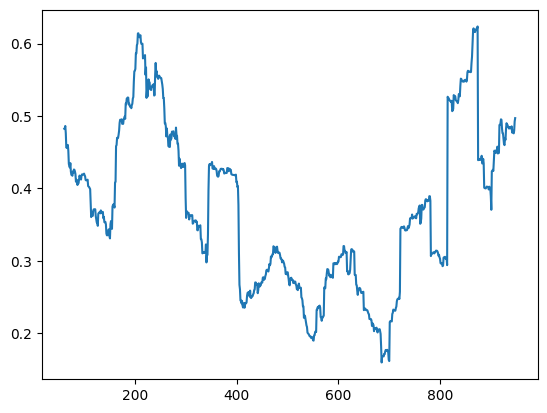

In [15]:
candles['volatility60'].plot()